In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import dataset

In [2]:
data = pd.read_csv('data/Aug20.csv')
data.head(100)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

X[:5, :]
y[:5]

array([ 45000,  50000,  60000,  80000, 110000])

# Training model on complete dataset 

In [25]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=3)

model.fit(X, y)

model.score(X, y)

0.9981171489761319

<Figure size 12800x9600 with 0 Axes>

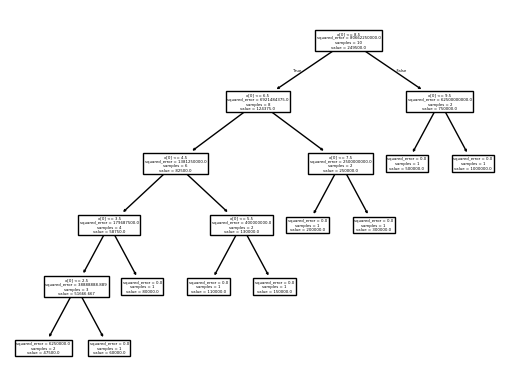

<Figure size 12800x9600 with 0 Axes>

In [22]:
from sklearn.tree import plot_tree

plot_tree(model)
plt.figure(dpi=2000)

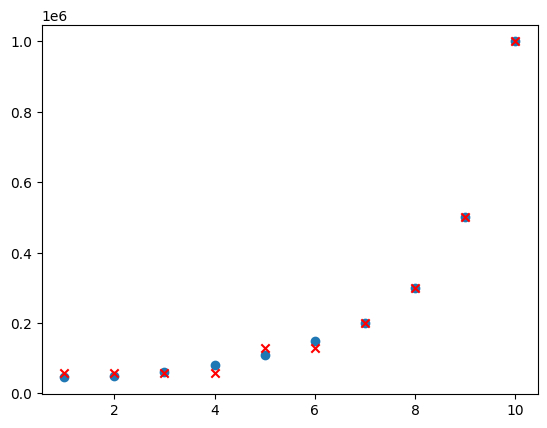

In [26]:
y_pred = model.predict(X)
plt.scatter(X, y, label='actual')
plt.scatter(X, y_pred, label='predictions', marker='x', c='r')
plt.ledgend()
plt.show()

# Random forest

Decision Tree is part of random forest
For this project you have to explotre publicly available data from landing club.com It connect people who need money with the people who have money. As an invester you want to invest in people who showed the profile of having high probability of paying debth. Try to create model that would help inverster to predict the set

__Objective__ 
it to use lending data from 2007 to 2010 and try to classify and predict wheather or not the borrower paid the loan amount.

The csv provided is clearn for na values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/28Aug.csv')
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
data.describe(include='all')

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
unique,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,debt_consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.804970,NaN,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,NaN,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,NaN,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,NaN,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,NaN,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,NaN,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000


In [5]:
data['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

## Features

### Numerical features

1. int.rate
2. installment
3. log.annual.inc
4. dti (The debt-to-income ratio)
5. fico
6. days.with.cr.lin
7. revol.bal
8. inq.last.6mths
9. delinq.2yrs
10. pub.rec
    
## Categorical data

1. credit.policy
2. purpose
3. not.fully.paid

In [6]:
numeric_features = [
    'int.rate',
    'installment',
    'log.annual.inc',
    'dti',
    'fico',
    'days.with.cr.line',
    'revol.bal',
    'revol.util',
    'inq.last.6mths',
    'delinq.2yrs',
]

categorical_features = [
    'credit.policy',
    'purpose',
    'pub.rec'
]

## Let us plot all numerical values

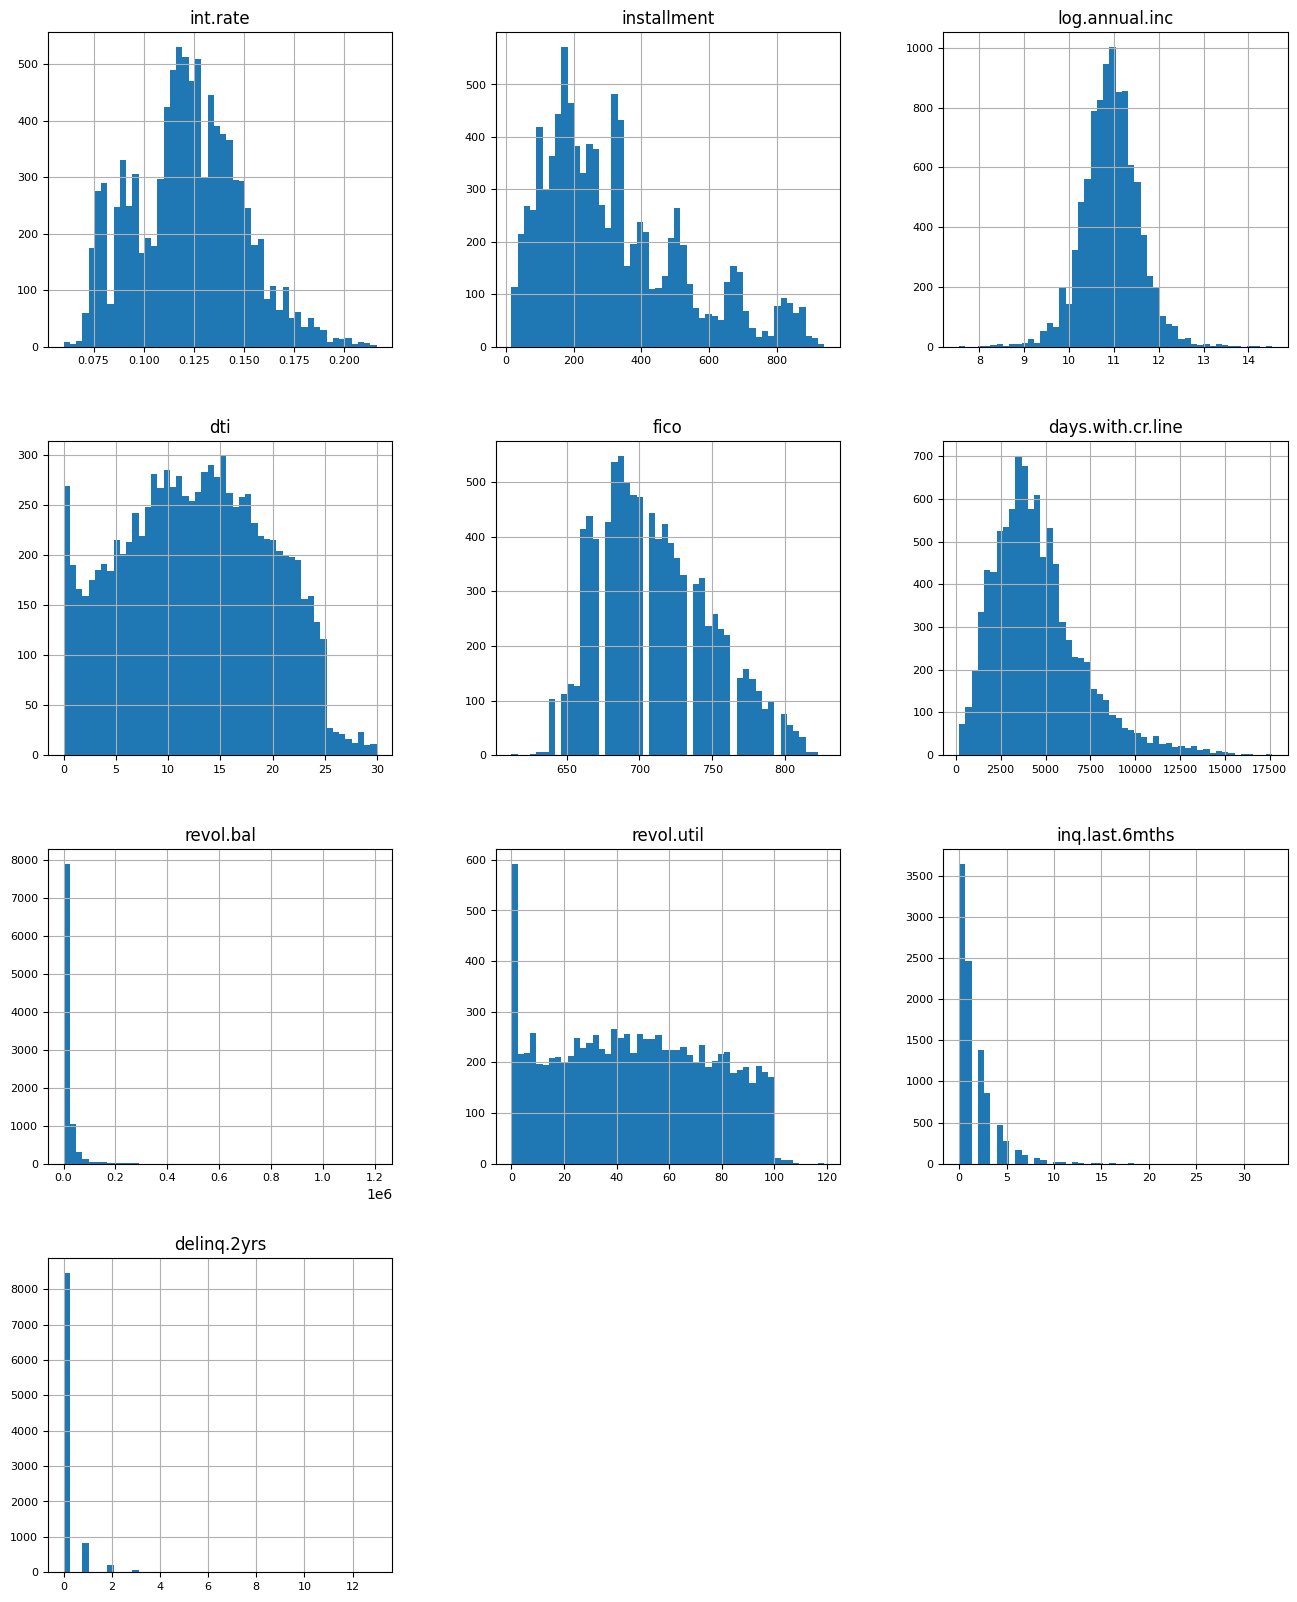

In [8]:
numeric_data = data[numeric_features]
numeric_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

## Testing the corelation between the features and output

### 1. Numeric features corelation with categorical output feature

Since output features is categorical, we need to use __Point-biserial correlation__

In [7]:
from scipy.stats import pointbiserialr
for feature in numeric_features:
    statisitcs, p_value = pointbiserialr(data['not.fully.paid'], data[feature])
    print(f"feature: {feature}\t\t Significance: {statisitcs} p-value: {p_value: }")

feature: int.rate		 Significance: 0.159551582518155 p-value:  1.2205604779868868e-55
feature: installment		 Significance: 0.04995516207059686 p-value:  1.0012609650457798e-06
feature: log.annual.inc		 Significance: -0.033439376541929945 p-value:  0.0010637173827583153
feature: dti		 Significance: 0.03736152382778258 p-value:  0.00025491637675983416
feature: fico		 Significance: -0.14966630307483775 p-value:  4.227100096645501e-49
feature: days.with.cr.line		 Significance: -0.02923667180034767 p-value:  0.004215735540156726
feature: revol.bal		 Significance: 0.05369936313529128 p-value:  1.452213018749246e-07
feature: revol.util		 Significance: 0.08208776761020006 p-value:  8.537810348259893e-16
feature: inq.last.6mths		 Significance: 0.14945194425507996 p-value:  5.7947972176008906e-49
feature: delinq.2yrs		 Significance: 0.008881040947098002 p-value:  0.38481058636898285


Based on corelation test all numeric feature are little corelated with target feature(debth not paid or paid). Let us plot to learn more information about the data.

In [ ]:
# for i in range(0, len(numeric_features), 3):
#     sns.pairplot(data=data, x_vars=data[numeric_features].columns[i: i+3], y_vars=['not.fully.paid'], diag_kind='kde')
for i in range(len(numeric_features)):
    sns.jointplot(x=numeric_features[i], y='not.fully.paid', data=data, kind='kde')


### 2. Comparing corelation between categorical featres
We well use here chi test

In [8]:
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

for feature in categorical_features:
    contingency_table = pd.crosstab(data['not.fully.paid'], data[feature])
    chi, p, dof, expected = chi2_contingency(contingency_table)

    print(f"feature: {feature}\t chi: {chi}, p-value: {p}")

feature: credit.policy	 chi: 238.3788010698609, p-value: 8.87573133930704e-54
feature: purpose	 chi: 96.9846958906326, p-value: 1.0672453117980497e-18
feature: pub.rec	 chi: 39.56110774714441, p-value: 1.830777027585089e-07


Based on the Chi test it feels like the features are fairly corelated with the target feature

### Conclusion

All give feature are little or more but related to the target feature i.e. do customer not repay the depth(1) or repay(0)

## Training model

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_pipeline = Pipeline(
    steps=[('encoder', StandardScaler())]
)

categorical_pipeline = Pipeline(
    steps=[('encoder', OneHotEncoder())]
)

In [10]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(
    transformers=[
        ('numeric', numeric_pipeline, numeric_features), 
        ('categorical', categorical_pipeline, categorical_features)
    ]
)

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = Pipeline(
    steps=[
        ('preprocessing', preprocessing),
        ('model', RandomForestClassifier(max_depth=10, random_state=1234))
    ]
)

model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('encoder',
                                                                   StandardScaler())]),
                                                  ['int.rate', 'installment',
                                                   'log.annual.inc', 'dti',
                                                   'fico', 'days.with.cr.line',
                                                   'revol.bal', 'revol.util',
                                                   'inq.last.6mths',
                                                   'delinq.2yrs']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['credit.policy', 'purpose',
                                                   'pub.rec'])])),
                ('model',
                 RandomForestClassifier(max_depth=10, random_state=1234))])

In [16]:
from sklearn.model_selection import train_test_split

X = data[numeric_features + categorical_features]
y = data.iloc[:, -1]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

model.fit(X_train, y_train)
model.score(X_train, y_train)

0.8583920647350561

In [13]:
model.score(X_cv, y_cv)

0.83785664578984

In [14]:
model.score(X_test, y_test)

0.8357689631176062

## Since we have problem of overfitting, we are going to do Hyperparameter tuning(Grid Search)

In [15]:
from sklearn.model_selection import GridSearchCV

rf_grid = RandomForestClassifier()
gr_space = {
    'max_depth': [3, 5, 10, 15, 20],
    'n_estimators': [10, 30, 60, 100],
    'max_features': [3,5,8,10,13],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(rf_grid, gr_space, cv = 3, scoring='accuracy', verbose = 3)
X_train_prepro = preprocessing.fit_transform(X_train)
model_grid = grid.fit(X_train_prepro, y_train)

print('Best hyperparameters are '+str(model_grid.best_params_))
print('Best score is: ' + str(model_grid.best_score_))

Fitting 3 folds for each of 300 candidates, totalling 900 fits
[CV 1/3] END max_depth=3, max_features=3, min_samples_leaf=1, n_estimators=10;, score=0.841 total time=   0.2s
[CV 2/3] END max_depth=3, max_features=3, min_samples_leaf=1, n_estimators=10;, score=0.841 total time=   0.1s
[CV 3/3] END max_depth=3, max_features=3, min_samples_leaf=1, n_estimators=10;, score=0.841 total time=   0.1s
[CV 1/3] END max_depth=3, max_features=3, min_samples_leaf=1, n_estimators=30;, score=0.841 total time=   0.4s
[CV 2/3] END max_depth=3, max_features=3, min_samples_leaf=1, n_estimators=30;, score=0.841 total time=   0.4s
[CV 3/3] END max_depth=3, max_features=3, min_samples_leaf=1, n_estimators=30;, score=0.841 total time=   0.4s
[CV 1/3] END max_depth=3, max_features=3, min_samples_leaf=1, n_estimators=60;, score=0.841 total time=   0.8s
[CV 2/3] END max_depth=3, max_features=3, min_samples_leaf=1, n_estimators=60;, score=0.841 total time=   0.5s
[CV 3/3] END max_depth=3, max_features=3, min_sam

Text(0.5, 0, 'fico')

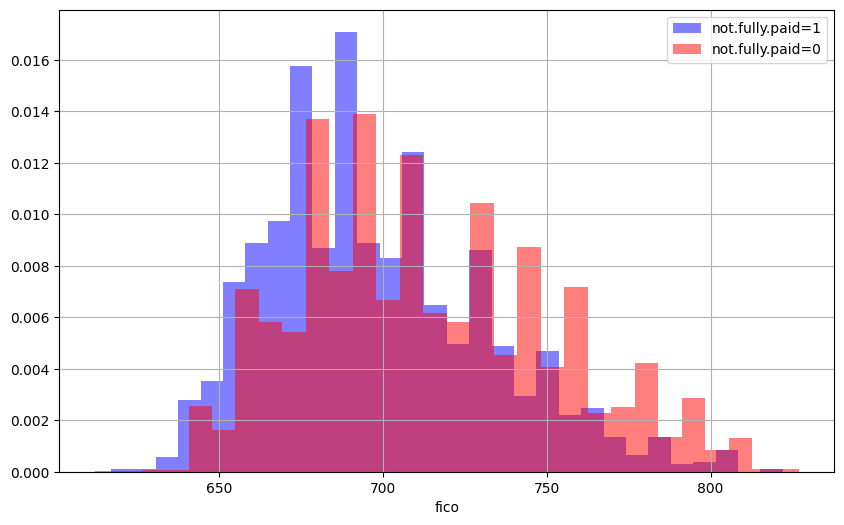

In [23]:
plt.figure(figsize=(10, 6))
data[data['not.fully.paid'] == 1]['fico'].hist(alpha=0.5, color='blue', bins=30, label= 'not.fully.paid=1', density=True)

data[data['not.fully.paid'] == 0]['fico'].hist(alpha=0.5, color='red', bins=30, label= 'not.fully.paid=0', density=True)
plt.legend()
plt.xlabel('fico')

<Axes: xlabel='purpose', ylabel='count'>

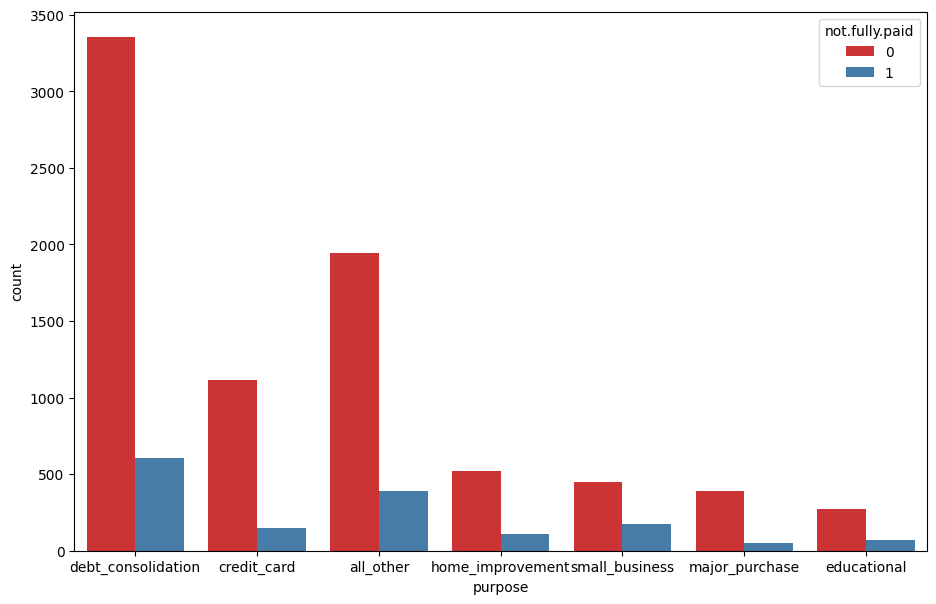

In [24]:
plt.figure(figsize=(11, 7))
sns.countplot(x='purpose', hue='not.fully.paid', data=data, palette='Set1')

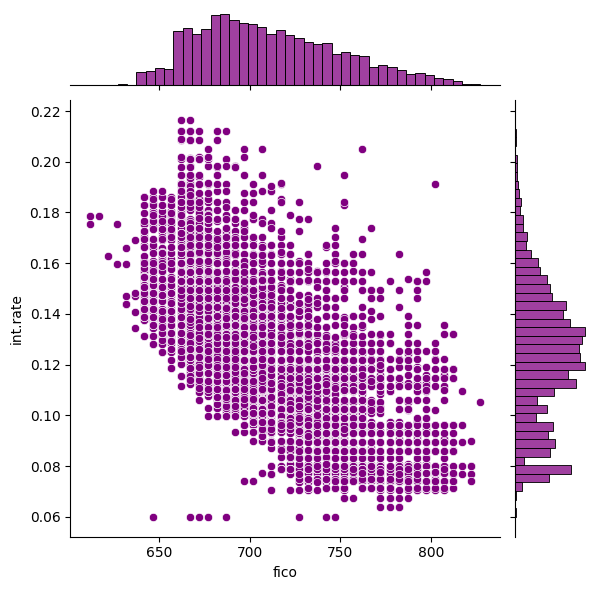

In [26]:
sns.jointplot(x='fico', y='int.rate', data=data, color='purple')

In [ ]:
create following implot to set if ther trend differed 

<Figure size 1100x700 with 0 Axes>

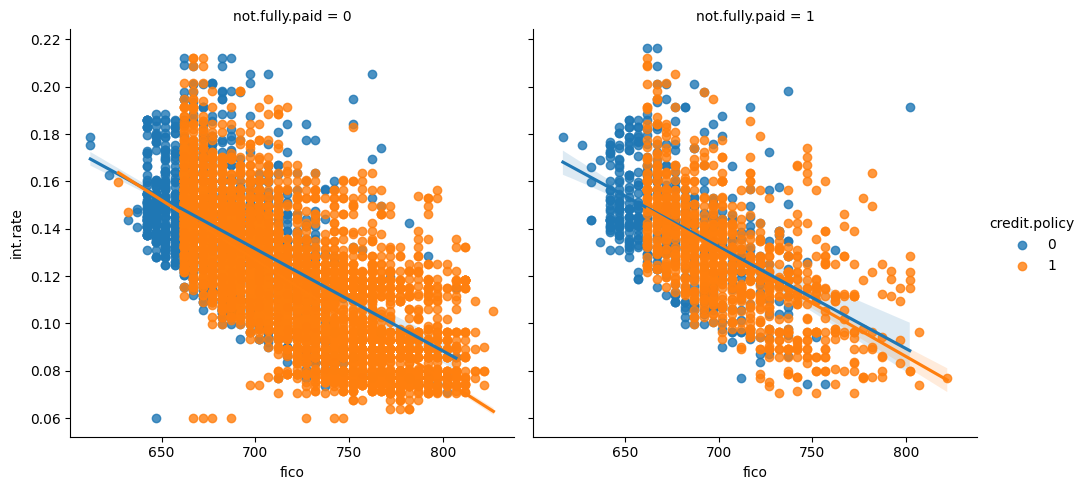

In [29]:
plt.figure(figsize=(11, 7))
sns.lmplot(y='int.rate', x='fico', data= data, hue='credit.policy', col='not.fully.paid')

In [30]:
final_data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

In [31]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   int.rate                    9578 non-null   float64
 1   installment                 9578 non-null   float64
 2   log.annual.inc              9578 non-null   float64
 3   dti                         9578 non-null   float64
 4   fico                        9578 non-null   int64  
 5   days.with.cr.line           9578 non-null   float64
 6   revol.bal                   9578 non-null   int64  
 7   revol.util                  9578 non-null   float64
 8   inq.last.6mths              9578 non-null   int64  
 9   delinq.2yrs                 9578 non-null   int64  
 10  not.fully.paid              9578 non-null   int64  
 11  credit.policy_1             9578 non-null   bool   
 12  purpose_credit_card         9578 non-null   bool   
 13  purpose_debt_consolidation  9578 

In [32]:
final_data.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,...,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,pub.rec_1,pub.rec_2,pub.rec_3,pub.rec_4,pub.rec_5
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,...,True,False,False,False,False,False,False,False,False,False
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,...,False,False,False,False,False,False,False,False,False,False
2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,...,True,False,False,False,False,False,False,False,False,False
3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,...,True,False,False,False,False,False,False,False,False,False
4,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,...,False,False,False,False,False,False,False,False,False,False


In [33]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

In [40]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y)
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2021
           1       0.20      0.21      0.21       374

    accuracy                           0.74      2395
   macro avg       0.53      0.53      0.53      2395
weighted avg       0.75      0.74      0.75      2395



In [44]:
print(confusion_matrix(y_test, y_pred))

[[1697  324]
 [ 294   80]]
